In [102]:
%matplotlib notebook

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")

In [104]:
df = pd.read_csv("MNC_Salaries.csv")
df.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   DOJ       457 non-null    object 
 6   Weight    457 non-null    int64  
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [106]:
df[["Age", "Weight", "Salary"]].describe()

,Age,Weight,Salary
count,457.000000,457.000000,4.460000e+02
mean,26.938731,221.522976,4.842684e+06
std,4.404016,26.368343,5.229238e+06
min,19.000000,161.000000,3.088800e+04
25%,24.000000,200.000000,1.044792e+06
50%,26.000000,220.000000,2.839073e+06
75%,30.000000,240.000000,6.500000e+06
max,40.000000,307.000000,2.500000e+07


    Average age is 27 while the joining age seems to be 19 yrs
    Weight is clearly in pounds and Salary is in USD
    A few missing values in college as well as in salary.

In [107]:
df[["Team", "Position", "College"]].describe()

,Team,Position,College
count,457,457,373
unique,30,5,118
top,New Orleans Pelicans,SG,Kentucky
freq,19,102,22


    So 30 teams.
    5 playing positions : PG (point guard) 
                          SG (Shooting guard)
                          SF (Small forward)
                          PF (Power forward)
                          C  (Center)
    118 colleges

# Data Exploration

<IPython.core.display.Javascript object>


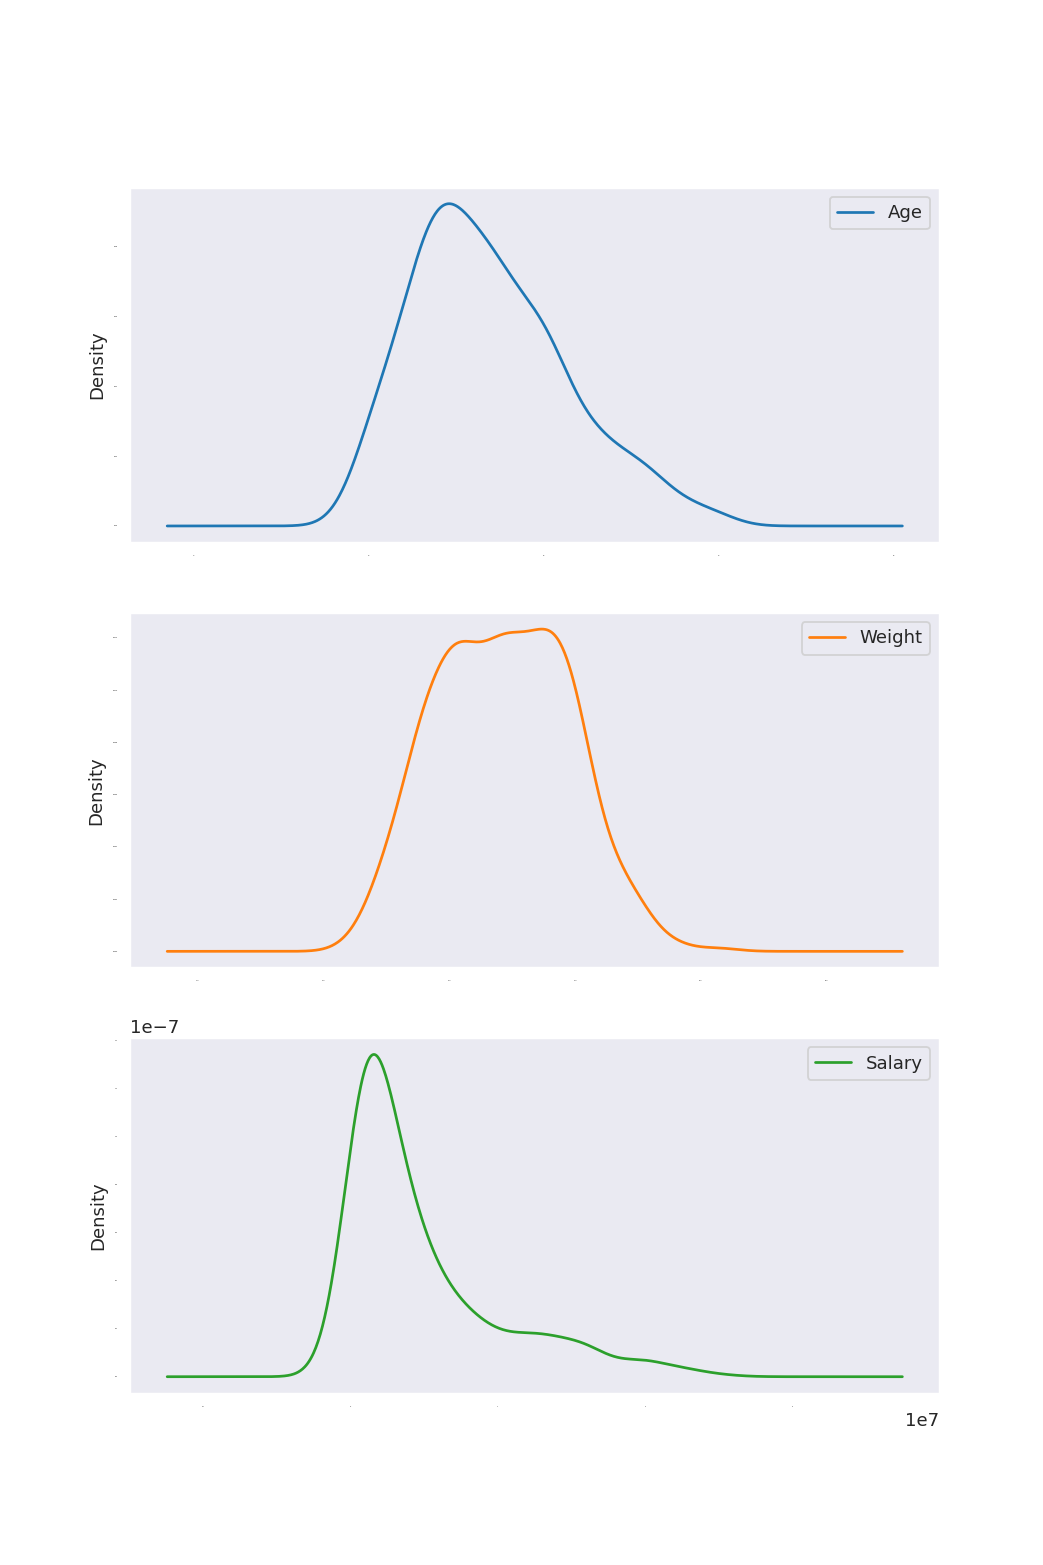

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efcc047ed90>],
      dtype=object)

In [108]:
df[["Age", "Weight", "Salary"]].plot(kind = 'density',subplots = True, sharex =False, sharey = False, fontsize = 0.25,
        layout = (3,1),figsize=(8,12))

In [109]:
# For analysis purpose, dividing the dataset into numerical variables and categorical variables

In [110]:
df_num = df[["Age", "Weight", "Salary"]]

<IPython.core.display.Javascript object>


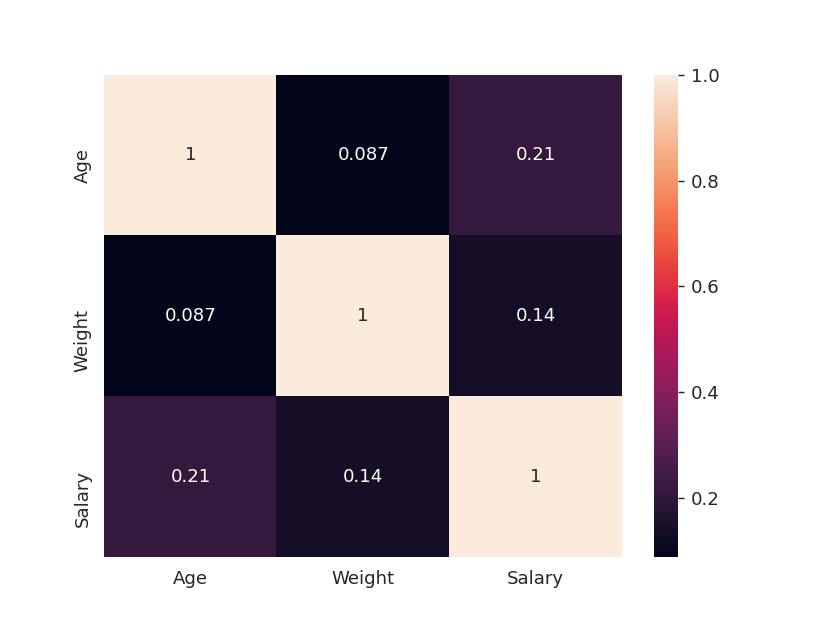

In [111]:
plt.figure()
sns.heatmap(df_num.corr(), annot=True)

<IPython.core.display.Javascript object>


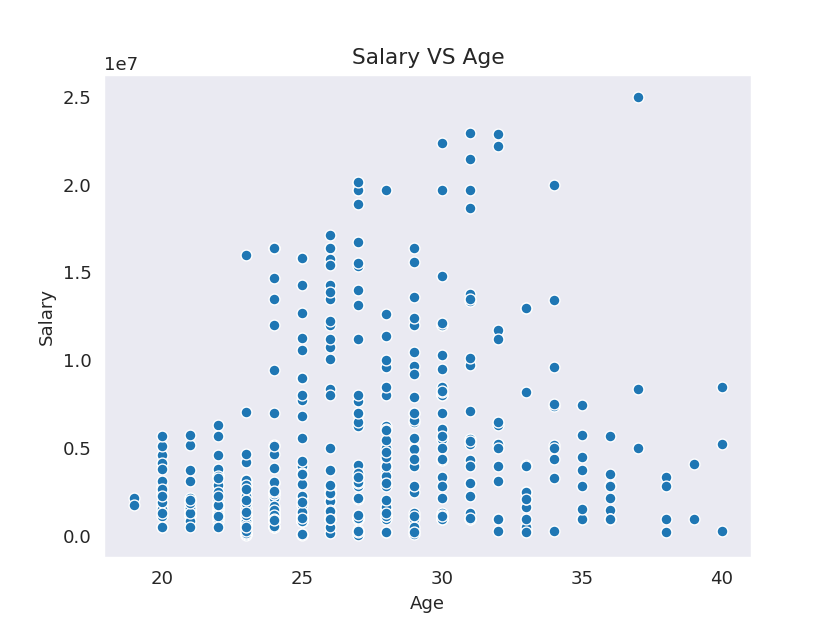

Text(0.5, 1.0, 'Salary VS Age')

In [112]:
plt.figure()
sns.scatterplot(x = "Age", y = "Salary", data = df_num)
plt.title("Salary VS Age")

<IPython.core.display.Javascript object>


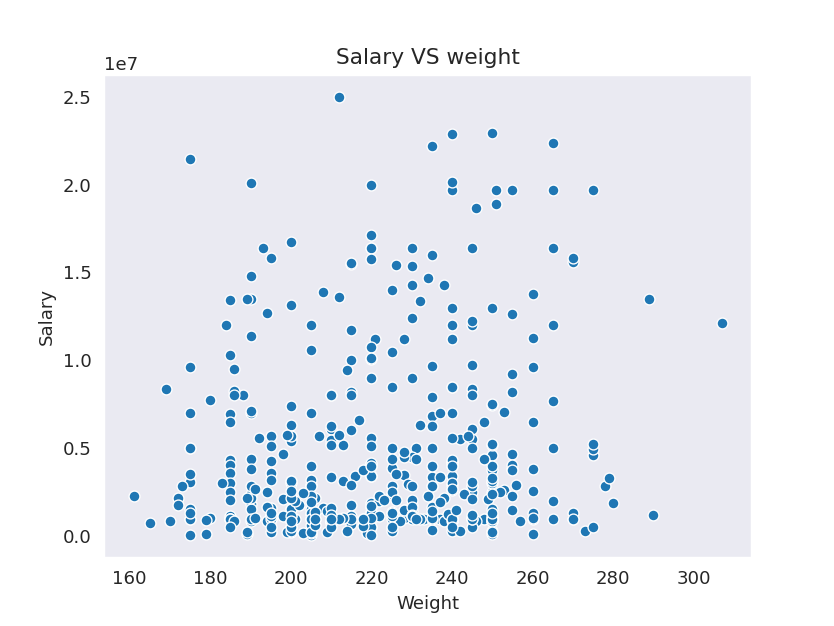

Text(0.5, 1.0, 'Salary VS weight')

In [113]:
plt.figure()
sns.scatterplot(x = "Weight", y = "Salary", data = df_num)
plt.title("Salary VS weight")

    As we see, both the factors have moderate correlation with Salary

<IPython.core.display.Javascript object>


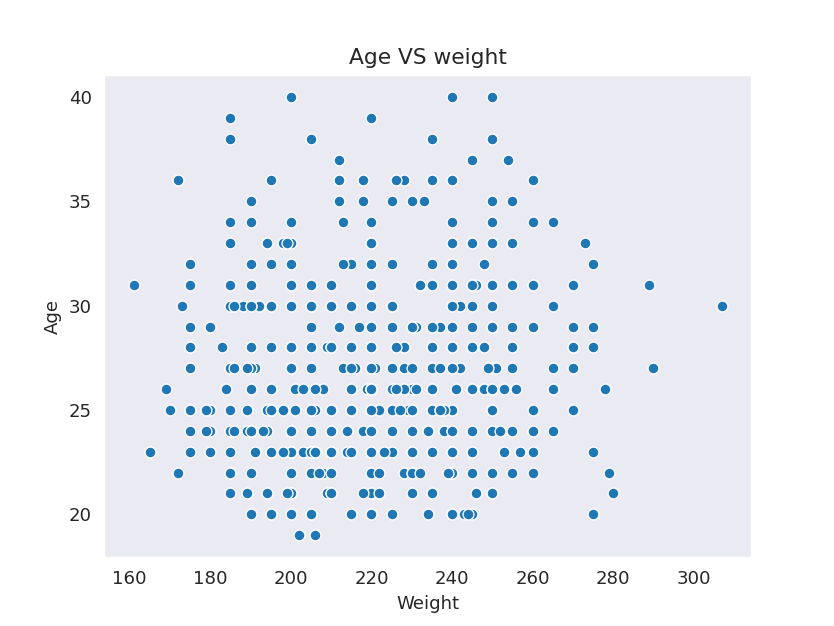

Text(0.5, 1.0, 'Age VS weight')

In [114]:
plt.figure()
sns.scatterplot(y = "Age", x = "Weight", data = df_num)
plt.title("Age VS weight")

    Once again, poor correlation

<IPython.core.display.Javascript object>


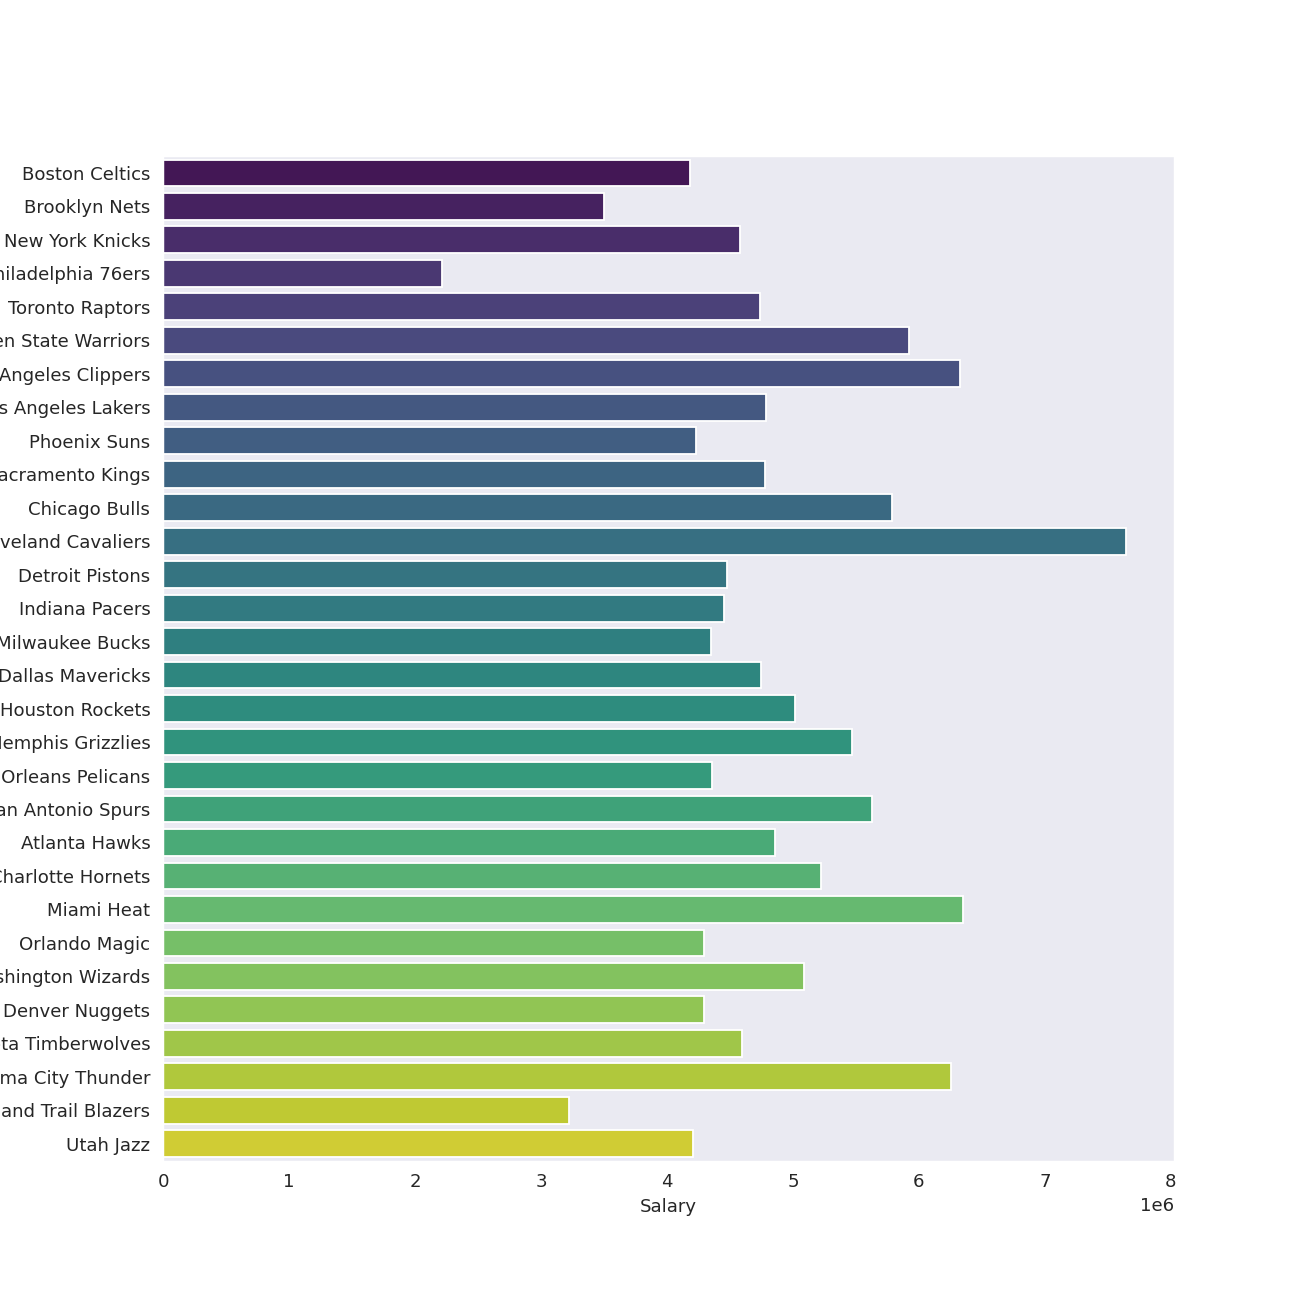

In [115]:
plt.figure().set_size_inches(10,10)
sns.barplot(y = "Team", x = "Salary", data = df, orient = 'h', ci = None,palette = 'viridis')

<IPython.core.display.Javascript object>


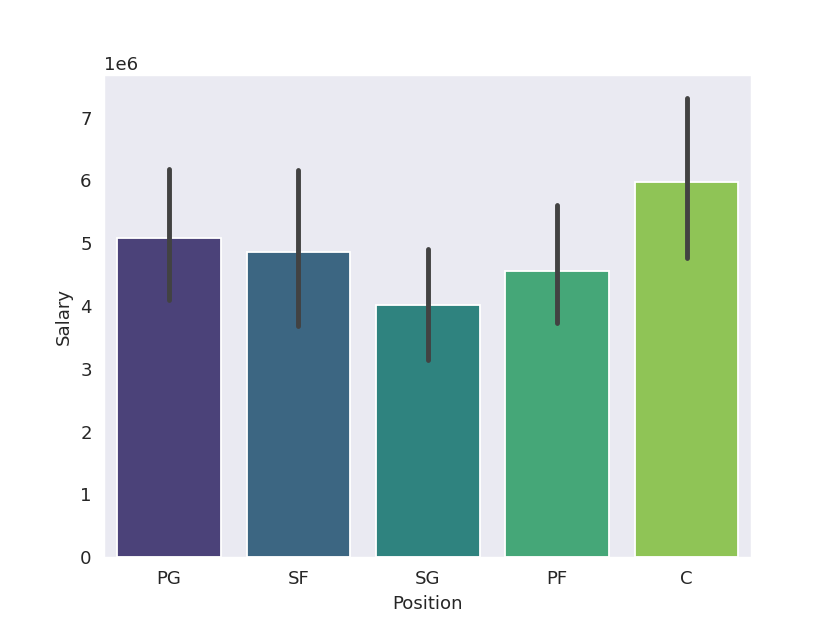

In [116]:
plt.figure()
sns.barplot(x = "Position", y = "Salary", data = df, palette = 'viridis')

Centers seem to be getting a higher salary followed by PG 

In [117]:
top_clgs = list(df["College"].value_counts().head(15).index)

In [118]:
top_clgs

['Kentucky',
 'Duke',
 'Kansas',
 'North Carolina',
 'UCLA',
 'Arizona',
 'Florida',
 'Texas',
 'Syracuse',
 'USC',
 'Washington',
 'Connecticut',
 'Michigan State',
 'Wake Forest',
 'LSU']

In [119]:
def top_college(row):
    if row["College"] in top_clgs:
        row["Top College"] = 1
    else:
        row["Top College"] = 0
    return row
df = df.apply(top_college, axis =1)
df.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary,Top College
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0,1
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0,0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN,0
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0,0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0,0


In [120]:
topclg_df = df[df["Top College"] == 1]

<IPython.core.display.Javascript object>


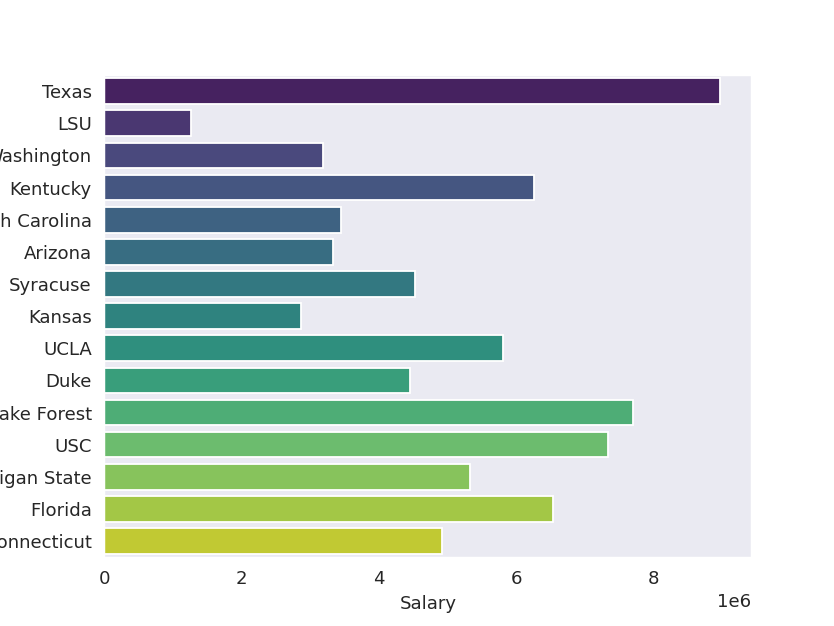

In [121]:
plt.figure()
sns.barplot(y = "College", x = "Salary", data = topclg_df, palette = 'viridis', orient = 'h', ci = None)

In [122]:
top_clgs_salary = df.groupby("College")["Salary"].mean().sort_values(ascending = False).head(10)

<IPython.core.display.Javascript object>


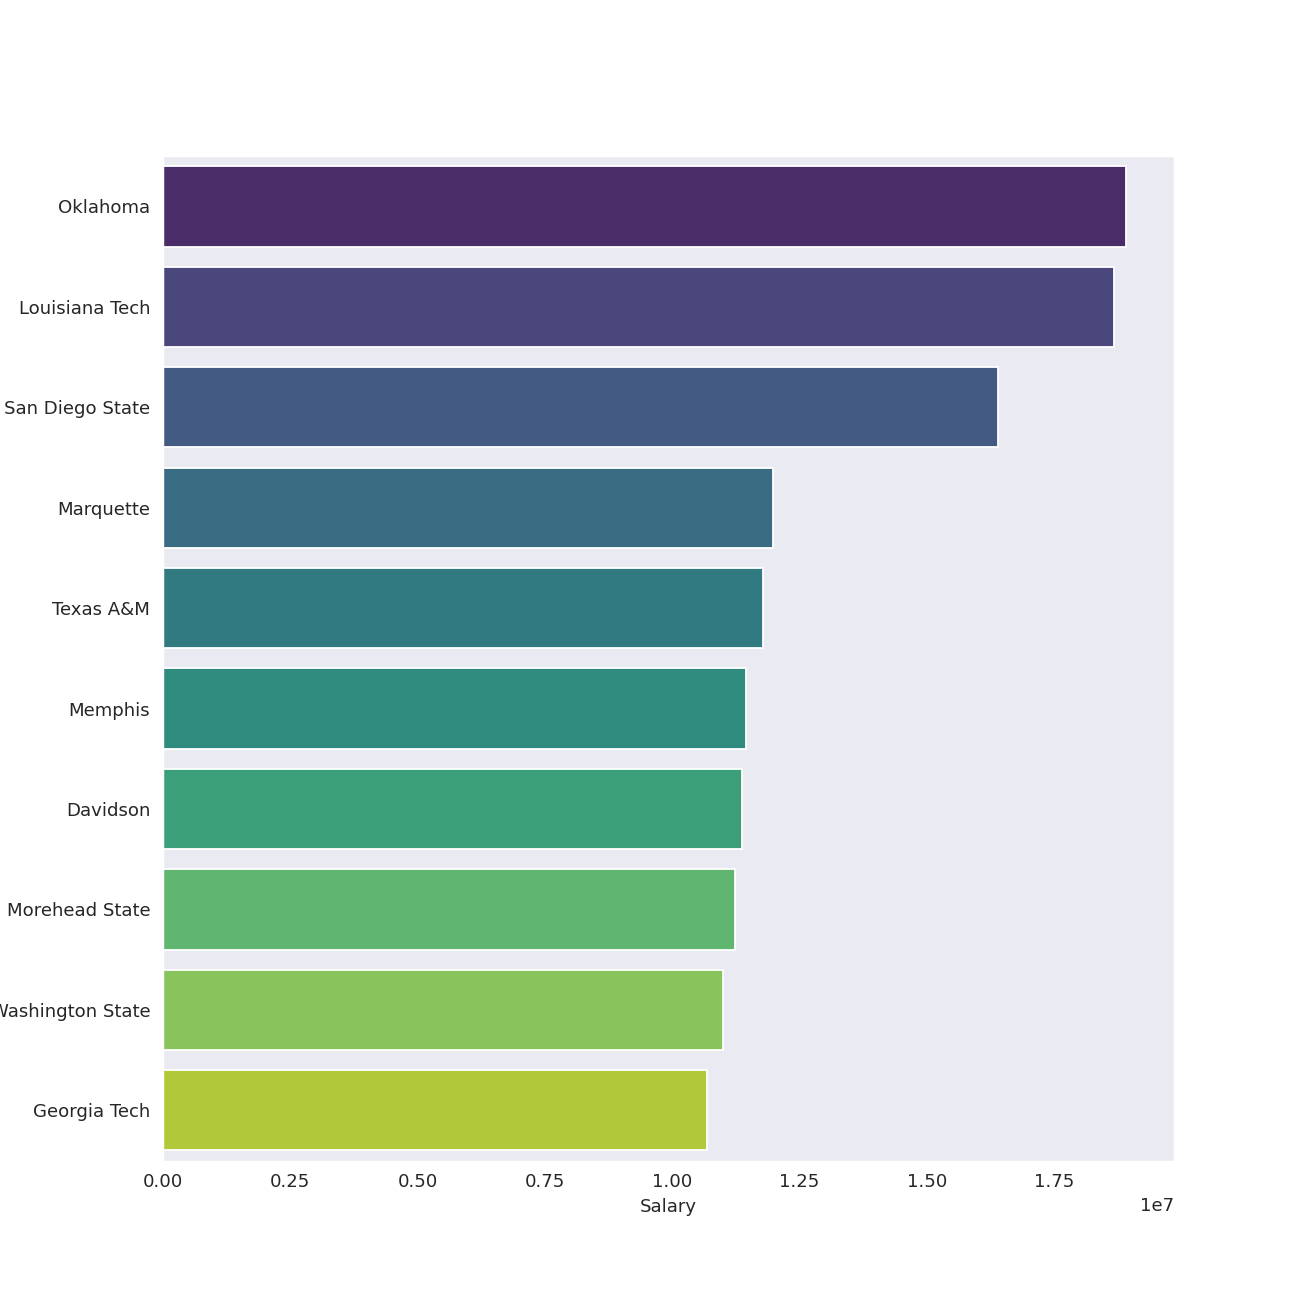

Text(0, 0.5, 'Mean Salary')

In [123]:
plt.figure().set_size_inches(10,10)
sns.barplot(y = top_clgs_salary.index, x = top_clgs_salary,orient = 'h', ci = None, palette = 'viridis')
plt.ylabel("Mean Salary") 

## Data Cleaning

In [124]:
df.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary,Top College
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0,1
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0,0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN,0
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0,0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0,0


lets drop the names

In [125]:
df.drop("Name", axis = 1, inplace = True)

Also the Number column which represents the jersey number of the players is irelevant to the model

In [126]:
df.drop("Number", axis = 1, inplace = True)

In [127]:
df.head()

,Team,Position,Age,DOJ,Weight,College,Salary,Top College
0,Boston Celtics,PG,25,06-Feb,180,Texas,7730337.0,1
1,Boston Celtics,SF,25,06-Jun,235,Marquette,6796117.0,0
2,Boston Celtics,SG,27,06-May,205,Boston University,NaN,0
3,Boston Celtics,SG,22,06-May,185,Georgia State,1148640.0,0
4,Boston Celtics,PF,29,06-Oct,231,NaN,5000000.0,0


Lets start with Team:

we can do One hot encoding

In [128]:
def dummies(column):
    global df
    df1 = pd.get_dummies(df[column], drop_first = True)
    df = pd.concat([df1,df], axis = 1)
    df.drop(column, axis = 1, inplace = True)
    print(df.shape)

In [129]:
df.shape

(457, 8)

In [130]:
dummies("Team")

(457, 36)


In [131]:
df.shape

(457, 36)

In [132]:
dummies("Position")

(457, 39)


In [133]:
# For College: Top 10 frequent college will be kept, others will be assigned 0 in all
df.drop("Top College", axis = 1, inplace = True)


In [134]:
for i in top_clgs:
    df[i] = np.where(df["College"] == i, 1, 0)
df.shape

(457, 53)

In [135]:
#Dropping DOJ
df.drop("DOJ", axis = 1, inplace = True)

## Normalizing Data

Both the columns Age and Weight are distributed normally, here I wont perform normalization

The only thing remaining is filling up the salary, which we will fill by using median value

In [136]:
median = np.median(df["Salary"].dropna())
df["Salary"]=df["Salary"].fillna(median)


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PF                      457 non-null    uint8  
 1   PG                      457 non-null    uint8  
 2   SF                      457 non-null    uint8  
 3   SG                      457 non-null    uint8  
 4   Boston Celtics          457 non-null    uint8  
 5   Brooklyn Nets           457 non-null    uint8  
 6   Charlotte Hornets       457 non-null    uint8  
 7   Chicago Bulls           457 non-null    uint8  
 8   Cleveland Cavaliers     457 non-null    uint8  
 9   Dallas Mavericks        457 non-null    uint8  
 10  Denver Nuggets          457 non-null    uint8  
 11  Detroit Pistons         457 non-null    uint8  
 12  Golden State Warriors   457 non-null    uint8  
 13  Houston Rockets         457 non-null    uint8  
 14  Indiana Pacers          457 non-null    ui

In [138]:
df.drop("College", axis = 1, inplace = True)

Now we are ready to build model

# Model

## train_test_split

In [139]:
from sklearn.model_selection import train_test_split

X = df.drop("Salary", axis = 1)
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

## Scaling

In [140]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## 1. Linear Regression

In [141]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train_scaled, y_train)
y_predict = linreg.predict(X_test_scaled)

In [142]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict)
score

-0.10011876344073034

In [143]:
from sklearn.linear_model import Ridge
linridge = Ridge().fit(X_train_scaled, y_train)
y_predict = linridge.predict(X_test_scaled)
score = r2_score(y_test, y_predict)
score

-0.046161734897766094

In [144]:
from sklearn.linear_model import Lasso
linlasso = Lasso().fit(X_train_scaled, y_train)
y_predict = linlasso.predict(X_test_scaled)
score = r2_score(y_test, y_predict)
score

-0.10011028579797476

In [145]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,50,2):
    knr = KNeighborsRegressor(n_neighbors = i).fit(X_train_scaled, y_train)
    y_predict = knr.predict(X_test_scaled)
    score = r2_score(y_test, y_predict)
    print(score)

-1.4773439168113973
-0.3615918938866074
-0.15710614476914997
-0.15104290579083468
-0.07862969914148166
-0.015519205675328163
0.03171519249671151
0.08104804208769789
0.07885105936845371
0.08780312143535529
0.07444064091420466
0.09906998922179144
0.10414143625230177
0.11872899252903013
0.1026566938440372
0.09189017502061392
0.08398087743929294
0.07744193275297884
0.0720587317228476
0.06115457891540754
0.05292281185334302
0.05473742840826823
0.039765405559379796
0.036474778988172085
0.03142054357718149


What am I doing wrong here?

Maybe I have too many Columns

In [146]:
df.shape

(457, 51)

Assuming all team follow similar salary structure

In [147]:
df.columns

Index(['PF', 'PG', 'SF', 'SG', 'Boston Celtics', 'Brooklyn Nets',
       'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons',
       'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies',
       'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves',
       'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder',
       'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns',
       'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs',
       'Toronto Raptors', 'Utah Jazz', 'Washington Wizards', 'Age', 'Weight',
       'Salary', 'Kentucky', 'Duke', 'Kansas', 'North Carolina', 'UCLA',
       'Arizona', 'Florida', 'Texas', 'Syracuse', 'USC', 'Washington',
       'Connecticut', 'Michigan State', 'Wake Forest', 'LSU'],
      dtype='object')

In [148]:
cols = ['Boston Celtics', 'Brooklyn Nets',
       'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons',
       'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies',
       'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves',
       'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder',
       'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns',
       'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs',
       'Toronto Raptors', 'Utah Jazz', 'Washington Wizards']

In [149]:
df.drop(cols, axis =1, inplace = True)

In [150]:
df.shape

(457, 22)

In [151]:
from sklearn.model_selection import train_test_split

X = df.drop("Salary", axis = 1)
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [153]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train_scaled, y_train)
y_predict = linreg.predict(X_test_scaled)

In [154]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict)
score

0.046000503242346724

Still a bad fit

A few years into the league, your college wont matter, so dropping colleges too

In [155]:
cols = ['Kentucky', 'Duke', 'Kansas', 'North Carolina', 'UCLA',
       'Arizona', 'Florida', 'Texas', 'Syracuse', 'USC', 'Washington',
       'Connecticut', 'LSU']
df.drop(cols, axis = 1, inplace = True)

In [157]:
from sklearn.model_selection import train_test_split

X = df.drop("Salary", axis = 1)
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [159]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train_scaled, y_train)
y_predict = linreg.predict(X_test_scaled)

In [160]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict)
score

0.030861997248843198

Maybe a scaling problem?

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [162]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train_scaled, y_train)
y_predict = linreg.predict(X_test_scaled)

In [163]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict)
score

0.0525231621009441

In [164]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,50,2):
    knr = KNeighborsRegressor(n_neighbors = i).fit(X_train_scaled, y_train)
    y_predict = knr.predict(X_test_scaled)
    score = r2_score(y_test, y_predict)
    print(score)

-0.771542868470241
-0.3721092316837258
-0.12386873553460354
-0.07522318059433597
-0.012565490386707845
0.01454040452426042
0.05841219539180287
0.09482132897924045
0.07811870950052391
0.09665238801546894
0.08609404329970449
0.0798222296436909
0.07298253679162925
0.08266717091728748
0.09538066552763114
0.07591621469660248
0.05809200825492766
0.04929075154030682
0.05072800084414186
0.04338189925131308
0.04056186978753984
0.04343340938393969
0.028551557735480015
0.020885242081821298
0.014899637792463283


Going to try polynomial regression:

In [165]:
from sklearn.preprocessing import PolynomialFeatures
X = df.drop("Salary", axis = 1)
y = df["Salary"]
poly = PolynomialFeatures(degree = 2)

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train_scaled, y_train)
y_predict = linreg.predict(X_test_scaled)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict)
score

-2.1517910739919013e+23

In [166]:
linridge = Ridge().fit(X_train_scaled, y_train)
y_predict = linridge.predict(X_test_scaled)
score = r2_score(y_test, y_predict)
score

0.0593771339553677

In [167]:
from sklearn.preprocessing import PolynomialFeatures
X = df.drop("Salary", axis = 1)
y = df["Salary"]
poly = PolynomialFeatures(degree = 3)

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train_scaled, y_train)
y_predict = linreg.predict(X_test_scaled)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict)
score

-8.238749963523987e+25